In [1]:
# uncomment for interactive 3d plot
#%matplotlib qt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import utils
import scipy
import sklearn.cluster


Bad key "text.kerning_factor" on line 4 in
/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%load_ext autoreload
%autoreload 2

In [42]:
df1 = pd.read_csv('../dl_paper/SourceData_Figure_1.csv')
df4 = pd.read_csv('../dl_paper/SourceData_Figure_4.csv')

In [43]:
df1['Modified sequence'] = df1['Modified sequence'].str.replace("_","")

# Correlation with Enzyme

In [4]:
Lysc = df1[df1['Experiment'].str.find('LysC') != -1]
Lysn = df1[df1['Experiment'].str.find('LysN') != -1]
Trip = df1[df1['Experiment'].str.find('Trp') != -1]

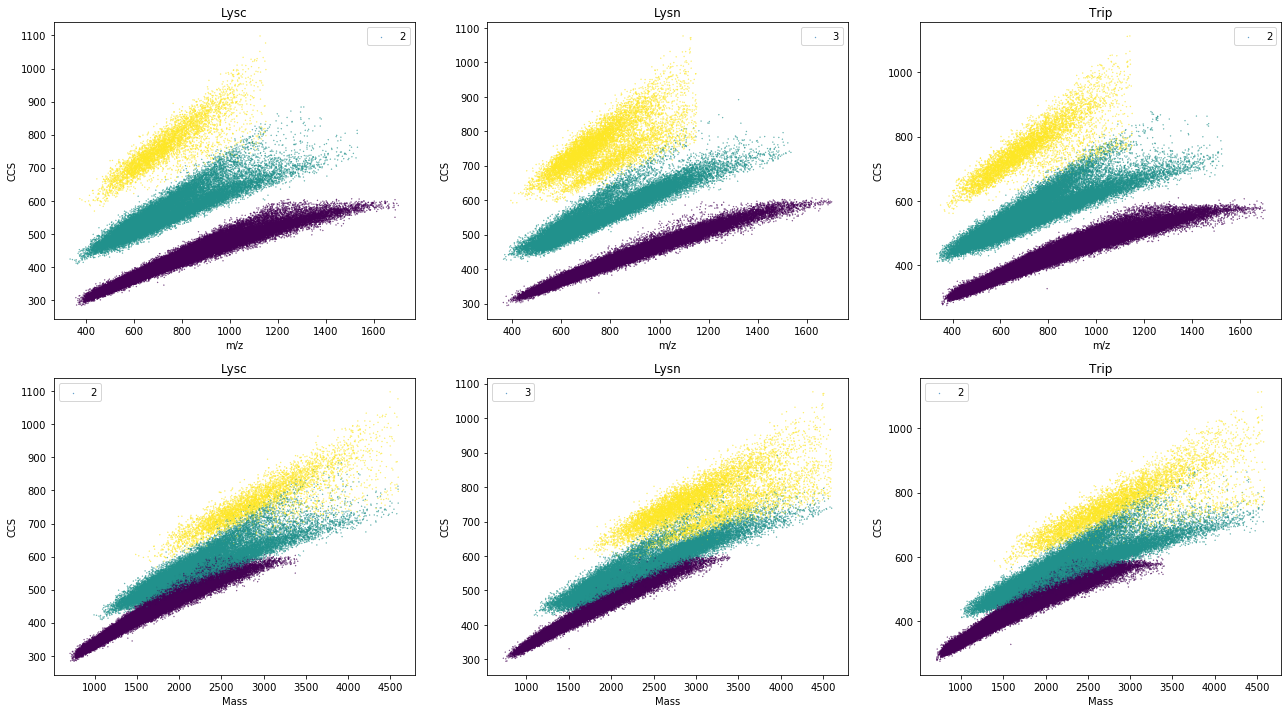

In [7]:
fig, ax_list = plt.subplots(nrows=2, ncols=3, figsize=(22,12))

for i, (ax, dfi) in enumerate(zip(ax_list[0,:],[Lysc, Lysn, Trip])):
    ax.scatter(dfi['m/z'], dfi['CCS'], s = 0.1, c = dfi['Charge'] )
    ax.set_xlabel('m/z')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Lysc', 'Lysn', 'Trip'][i]}")
    

for i, (ax, dfi) in enumerate(zip(ax_list[1,:],[Lysc, Lysn, Trip])):
    ax.scatter(dfi['Mass'], dfi['CCS'], s = 0.1, c = dfi['Charge'])
    ax.set_xlabel('Mass')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Lysc', 'Lysn', 'Trip'][i]}")
    

In [44]:
def getMinPosChargeDistance(peptideSequence, histidine=False, max_value=5):
    positiveAAs = {'K', 'R'}
    if histidine:
        positiveAAs.add('H')
    minDistance = -1
    i = -1
    for j in range(len(peptideSequence)):
        if peptideSequence[j] in positiveAAs:
            if minDistance == -1:
                minDistance = j - i
            else:
                minDistance = min(minDistance, j - i)
            i = j
    return min(minDistance, max_value)

In [45]:

for s in ["AAA", "RAA", "AAR", "AKR", "AKK"]:
    print(s, getMinPosChargeDistance(s))

AAA -1
RAA 1
AAR 3
AKR 1
AKK 1


In [49]:
df1_um = df1[df1['Modified sequence'].str.find("(")==-1]


In [50]:
df1_um['MinPosDistance'] = df1_um['Modified sequence'].apply(getMinPosChargeDistance)
df1_um['MinPosDistance_Hist'] = df1_um['Modified sequence'].apply(getMinPosChargeDistance, histidine=False)

/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'With H')

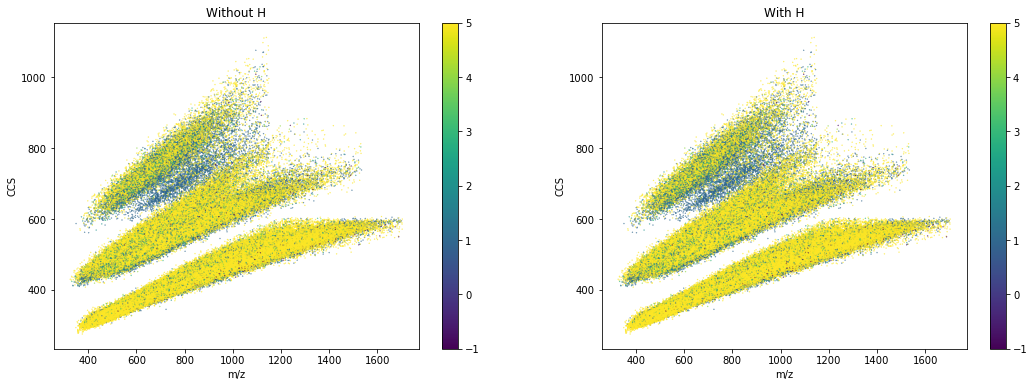

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

scatter = ax[0].scatter(df1_um['m/z'], df1_um['CCS'], s=0.1, c = df1_um['MinPosDistance'])
ax[0].set_xlabel('m/z')
ax[0].set_ylabel('CCS')
fig.colorbar(scatter, ax = ax[0])
ax[0].set_title('Without H')

scatter = ax[1].scatter(df1_um['m/z'], df1_um['CCS'], s=0.1, c = df1_um['MinPosDistance_Hist'])
ax[1].set_xlabel('m/z')
ax[1].set_ylabel('CCS')
fig.colorbar(scatter, ax = ax[1])
ax[1].set_title('With H')


In [53]:
Lysc_um = df1_um[df1_um['Experiment'].str.find('LysC') != -1]
Lysn_um = df1_um[df1_um['Experiment'].str.find('LysN') != -1]
Trip_um = df1_um[df1_um['Experiment'].str.find('Trp') != -1]

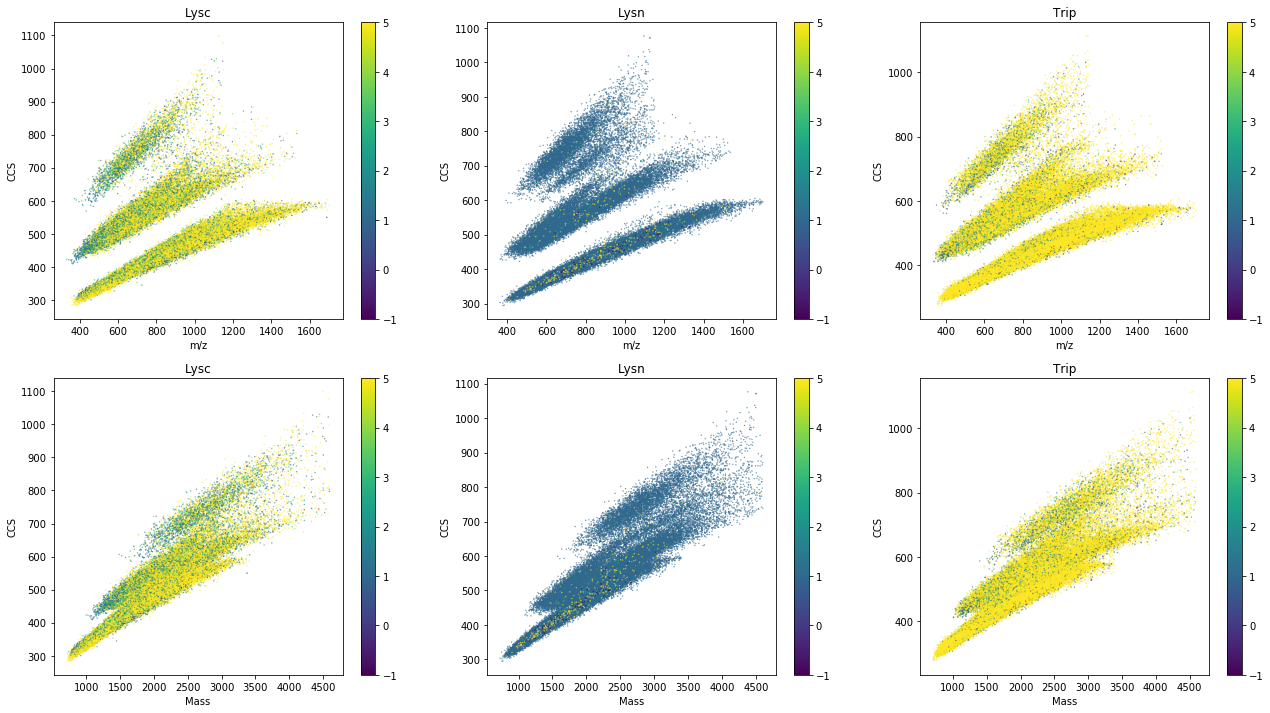

In [56]:
fig, ax_list = plt.subplots(nrows=2, ncols=3, figsize=(22,12))

for i, (ax, dfi) in enumerate(zip(ax_list[0,:],[Lysc_um, Lysn_um, Trip_um])):
    ax.scatter(dfi['m/z'], dfi['CCS'], s = 0.1, c = dfi['MinPosDistance'] )
    ax.set_xlabel('m/z')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Lysc', 'Lysn', 'Trip'][i]}")
    fig.colorbar(scatter, ax = ax)
    

for i, (ax, dfi) in enumerate(zip(ax_list[1,:],[Lysc_um, Lysn_um, Trip_um])):
    ax.scatter(dfi['Mass'], dfi['CCS'], s = 0.1, c = dfi['MinPosDistance'])
    ax.set_xlabel('Mass')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Lysc', 'Lysn', 'Trip'][i]}")
    fig.colorbar(scatter, ax = ax)

# Correlation with Organism

In [98]:
Hela = df1[df1['Experiment'].str.find('HeLa') != -1]
Dros = df1[df1['Experiment'].str.find('Droso') != -1]
Cele = df1[df1['Experiment'].str.find('CEle') != -1]
Ecol = df1[df1['Experiment'].str.find('Ecol') != -1]
Yeast = df1[df1['Experiment'].str.find('Yeast') != -1]

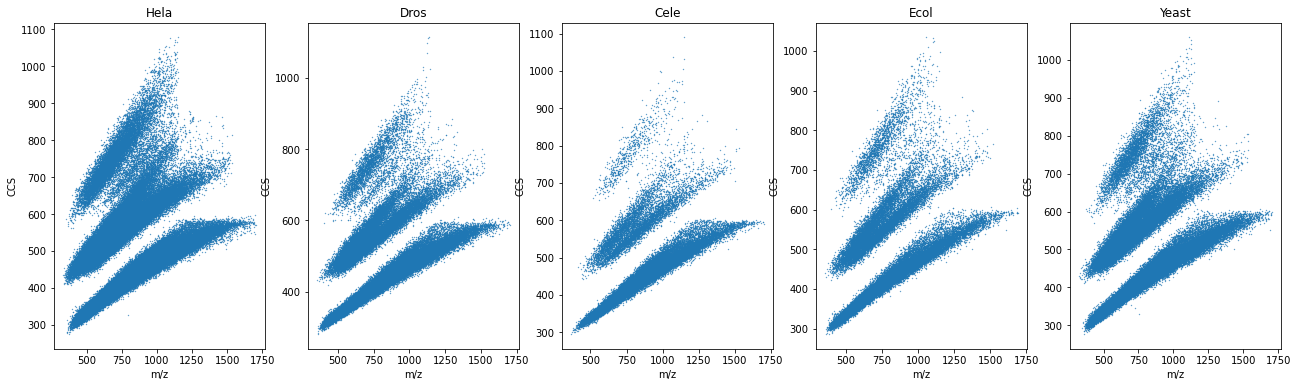

In [101]:
fig, ax_list = plt.subplots(nrows=1, ncols=5, figsize=(22,6))
for i, (ax, dfi) in enumerate(zip(ax_list,[Hela, Dros, Cele, Ecol, Yeast])):
    ax.scatter(dfi['m/z'], dfi['CCS'], s = 0.1)
    ax.set_xlabel('m/z')
    ax.set_ylabel('CCS')
    ax.set_title(f"{['Hela', 'Dros', 'Cele', 'Ecol', 'Yeast'][i]}")